In [1]:
#IMPORTATION
import os
os.chdir('C:\\Users\\SAMOU\\Documents\\Data_Science')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import load_workbook
import xlwings as xw
import xlsxwriter
P = pd.ExcelFile("Del_Annuel.xlsx")

In [2]:
F=P.parse('PV')

In [3]:
D=F.iloc[9,:].values

In [4]:
F.dropna(inplace=True)
F.columns=D
F.columns=F.columns.fillna("Decision")
F.rename(columns={'RESULTAT': 'Total_Credit'},inplace=True)


In [5]:
F=F.reset_index(drop=True)

In [6]:
F = F.sort_values(by=['Total_Credit','Nom','Prénom'], ascending=[False, True, True])


In [7]:
I = np.where(F.Decision == 'Passage Définitif')
I = F.iloc[I]
J = np.where(F.Decision == 'Passage Conditionnel')
J = F.iloc[J]
K = np.where(F.Decision == 'Redouble')
K = F.iloc[K]
L = np.where(F.Decision == 'Exclu')
L = F.iloc[L]



In [8]:
"""R = F.Decision.value_counts()
R = pd.DataFrame(R)
R.rename(columns={'Decision': 'Nombre_Etudiants'},inplace=True)

p1='{.1.f}'.format((R.Nombre_Etudiants['Passage Définitif']/np.sum(R.Nombre_Etudiants))*100)
p2="{.1f}".format((R.Nombre_Etudiants['Passage Conditionnel']/np.sum(R.Nombre_Etudiants))*100)
p3="{.1f}".format((R.Nombre_Etudiants['Redouble']/np.sum(R.Nombre_Etudiants))*100)
p4="{.1f}".format((R.Nombre_Etudiants['Exclu']/np.sum(R.Nombre_Etudiants))*100)

p=[p1,p2,p3,p4]
"""

'R = F.Decision.value_counts()\nR = pd.DataFrame(R)\nR.rename(columns={\'Decision\': \'Nombre_Etudiants\'},inplace=True)\n\np1=\'{.1.f}\'.format((R.Nombre_Etudiants[\'Passage Définitif\']/np.sum(R.Nombre_Etudiants))*100)\np2="{.1f}".format((R.Nombre_Etudiants[\'Passage Conditionnel\']/np.sum(R.Nombre_Etudiants))*100)\np3="{.1f}".format((R.Nombre_Etudiants[\'Redouble\']/np.sum(R.Nombre_Etudiants))*100)\np4="{.1f}".format((R.Nombre_Etudiants[\'Exclu\']/np.sum(R.Nombre_Etudiants))*100)\n\np=[p1,p2,p3,p4]\n'

In [9]:
"""V = R.Nombre_Etudiants.values
#for i in range(len(R.index)):
def func(allvalues):
    absolute = int(allvalues / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(allvalues, absolute)"""

'V = R.Nombre_Etudiants.values\n#for i in range(len(R.index)):\ndef func(allvalues):\n    absolute = int(allvalues / 100.*np.sum(allvalues))\n    return "{:.1f}%\n({:d} g)".format(allvalues, absolute)'

In [10]:
R = F.Decision.value_counts()
R = pd.DataFrame(R)
R.rename(columns={'Decision': 'Nombre_Etudiants'},inplace=True)

p1=(R.Nombre_Etudiants['Passage Définitif']/sum(R.Nombre_Etudiants)) * 100
p2=(R.Nombre_Etudiants['Passage Conditionnel'] /sum(R.Nombre_Etudiants))* 100

p3=(R.Nombre_Etudiants['Redouble'] /sum(R.Nombre_Etudiants))* 100
p4=(R.Nombre_Etudiants['Exclu'] /sum(R.Nombre_Etudiants))* 100
p=[p1,p2,p3,p4]

R = R.assign(Pourcentages=[p1,p2,p3,p4])
R.loc['Total']=[sum(R.Nombre_Etudiants),sum(p)]

r=np.where(R.Pourcentages[:4]-R.Pourcentages[:4].round() == (R.Pourcentages[:4]-R.Pourcentages[:4].round()).max())
R.Pourcentages[:4].iloc[r] = R.Pourcentages[:4].iloc[r].round() + sum(R.Pourcentages[:4]-R.Pourcentages[:4].round())
R.Pourcentages[:4].iloc[r]
R.Pourcentages = R.Pourcentages.round()
R

,Nombre_Etudiants,Pourcentages
Passage Définitif,27.0,60.0
Redouble,11.0,13.0
Passage Conditionnel,6.0,25.0
Exclu,1.0,2.0
Total,45.0,100.0


In [11]:
writer = pd.ExcelWriter("Déliberation.xlsx", engine="xlsxwriter")
F.to_excel(writer, "Resultat_Globaux")
R.to_excel(writer, "Graphique_Resultats_Globaux")
writer.save()

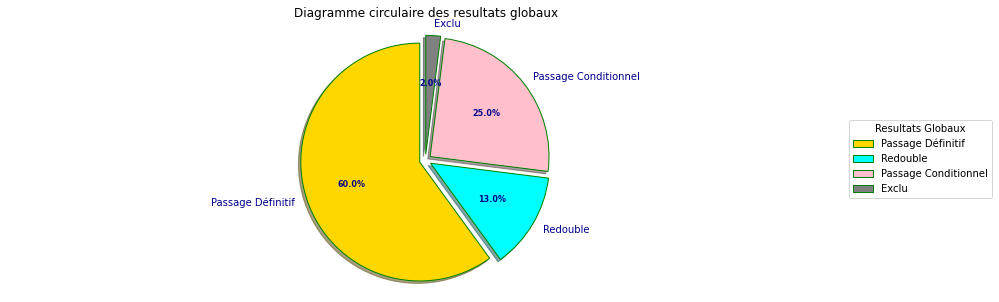

In [12]:
colors = ('gold','cyan','pink', 'grey')
wp = {'linewidth' : 1, 'edgecolor' :  'green'}
fig, ax = plt.subplots(figsize = (15, 5))
wedges, texts, autotexts = ax.pie(R.Pourcentages[:4],labels=R[:4].index, 
                                  explode=(0.05,0.05,0.05,0.05),
        autopct = '%1.1f%%', startangle=90, shadow=True,
        wedgeprops = wp, textprops = dict(color='darkblue'), colors=colors)
ax.legend(wedges, R[:4].index, title = 'Resultats Globaux', loc= 'center left', 
          bbox_to_anchor = (1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight = 'bold')
ax.set_title('Diagramme circulaire des resultats globaux')
plt.axis('equal')
plt.show()

In [13]:
"""
wb=xw.Book(r'C:\Users\SAMOU\Documents\Data_Science\Déliberation.xlsx')
sht = wb.sheets[1]
#xw_pf.sheets.add('Diagramme des resultats globaux')
#sheet = ('Graphique_Resultats_Globaux')
sht.pictures.add(fig, name='Graphique_Resultats_Globaux', update = True)

plt.show()
wb.sheets[1]"""

<Sheet [Déliberation.xlsx]Graphique_Resultats_Globaux>

In [16]:
writer = pd.ExcelWriter("Déliberation.xlsx", engine="xlsxwriter")
F.to_excel(writer, "Resultat_Globaux")
R.to_excel(writer, "Graphique_Resultats_Globaux")
writer.save()

delib = xw.Book("Déliberation.xlsx")
f = delib.sheets("Graphique_Resultats_Globaux")
ax = ax.get_figure()
f.pictures.add(ax, name = "Graphique_Resultats_Globaux", update = True)
plt.show()